<a href="https://colab.research.google.com/github/VitorFRodrigues/PUCMinas_DataScience/blob/main/06-Machine_Learning/Tarefas/Modulo_A/notebook/aprovacao_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório Final: Análise de Aprovação de Cartão de Crédito

Instituição: Pontifícia Universidade Católica de Minas Gerais

Aluno:

1. Vitor Fernando de Souza Rodrigues

Disciplina: Machine Learning

Docente: Cristiano Rodrigues de Carvalho

# 1. Introdução

A cadeira de crédito é composta basicamente de quatro pilares: a prospecção, a concessão, a gestão de risco e a recuperação.

1. **Prospecção**: É o processo de buscar e atrair potenciais clientes ou empresas interessadas em adquirir crédito. Envolve a análise de mercado, identificação de perfis ideais e estratégias de marketing para captar novos clientes.

2. **Concessão**: Nesta fase, a instituição avalia a capacidade de pagamento do cliente, com base em informações financeiras e comportamentais, para decidir sobre a aprovação ou rejeição do crédito solicitado.

3. **Gestão de Risco**: Trata-se do monitoramento e controle dos riscos associados ao crédito concedido. Envolve o acompanhamento contínuo do comportamento de pagamento do cliente, ajustes no limite de crédito e a adoção de medidas preventivas.

4. **Recuperação**: Quando ocorre inadimplência, a instituição foca na recuperação do crédito, utilizando estratégias de cobrança, renegociação de dívidas e, em casos mais graves, ações jurídicas para minimizar perdas.

Este trabalho será basicamente focado em solucionar um problema de concessão de linha de crédito. Pois bem, o uso de crédito tem se tornado uma prática cada vez mais comum entre os brasileiros, impulsionado por diversos fatores econômicos e tecnológicos, dentre eles se destacam:

* **Acesso facilitado ao crédito**: Nos últimos anos, as instituições financeiras expandiram suas ofertas de crédito, com cartões de crédito, crédito consignado e financiamento de bens. Dados do Banco Central do Brasil mostram que o saldo total de crédito no país cresceu significativamente, atingindo níveis históricos.

* **Tecnologia financeira (Fintechs)**: O surgimento de *fintechs* no Brasil democratizou ainda mais o acesso ao crédito. Com aplicativos simplificados e a oferta de serviços online, essas empresas permitem que consumidores tenham acesso a crédito de forma rápida e com menos burocracia, muitas vezes oferecendo taxas mais competitivas que os bancos tradicionais.

* **Pandemia e digitalização**: A pandemia de COVID-19 acelerou o uso de meios digitais de pagamento, incluindo o crédito. Com o aumento das compras online e a necessidade de evitar transações em dinheiro físico, o cartão de crédito e outros mecanismos de crédito digital se tornaram alternativas práticas e seguras para os consumidores.

Esses fatores combinados mostram como o crédito vem se consolidando como uma ferramenta essencial no cotidiano financeiro do brasileiro, facilitando o consumo, mas também apresentando desafios relacionados ao endividamento.

# 2. Descrição do Problema e da Solução Proposta

Basicamente o pedido de crédito funciona a partir da solicitação do cliente a uma Instituição Financeira para pedir algum tipo de crédito, seja cartão, empréstimo consignado, financiamento imobiliário, etc.

A Instituição financeira aprova ou não o pedido do cliente dados alguns critérios específicos. No geral, o banco possui uma série de informações do cliente, deste as quantidades de transações financeiras até status matrimonial são utilizados para identificar um bom ou mal pagador.

Dada estas informações a Instituição aprova ou recusa o fornecimento de crédito para o cliente. Neste trabalho, será utilizado um conjunto de dados extraído do [Kaggle](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction) em que receberemos diversas informações de clientes de um banco e seu histórico de transações, indicando se estes possuem um bom relacionamento bancário com pagamentos em dia.

Como solução para este problema, vamos explorar estes dados, criar uma regra para definir o bom e o mal pagador e, por fim, aplicar um modelo preditivo do tipo classificatório para indicar se o futuro solicitante terá seu crédito aprovado ou recusado.


# 3. Coleta de Dados

Conforme dito anteriormente conjunto de dados extraído do [Kaggle](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction) e salvo no [github](https://github.com/VitorFRodrigues/PUCMinas_DataScience/tree/main/06-Machine_Learning/Tarefas/Modulo_A/dados) do autor. A estrutura é formada por tabelas na extensão ```.csv```

## 3.1 Importação de Bibliotecas utilizadas neste Notebook

Este tópico será utilizado para armazenar em uma única célula todas as importações necessárias para o trabalho.

In [101]:
# Análise de dados
import pandas as pd

# Vizualização
import matplotlib.pyplot as plt
import seaborn as sns

# Categorização de dados
from sklearn.preprocessing import OneHotEncoder

## 3.2 Importação dos dados e descrição dos datasets

### 3.2.1 Dados dos clientes

In [102]:
URL_appRec = 'https://github.com/VitorFRodrigues/PUCMinas_DataScience/raw/refs/heads/main/06-Machine_Learning/Tarefas/Modulo_A/dados/application_record.csv'
dados_clientes = pd.read_csv(URL_appRec)
dados_clientes.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Conforme já foi dito, o dataset acima informa uma série de informações a respeito de vários clientes. Mais a frente analisaremos sua real quantidade, no momento vamos entender o que cada coluna representa:
* **Dados dos clientes**

| Coluna              | Explicação                                          | Observação                                                                                                       |
| ------------------- | --------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| ID                  | Número identificador do Cliente                     |                                                                                                                  |
| CODE_GENDER         | Gênero do cliente (Masculino/Feminino)              |                                                                                                                  |
| FLAG_OWN_CAR        | Se o cliente possui carro (Sim/Não)                 |                                                                                                                  |
| FLAG_OWN_REALTY     | Se o cliente possui imóvel (Sim/Não)                |                                                                                                                  |
| CNT_CHILDREN        | Quantidade de filhos que o cliente possui           |                                                                                                                  |
| AMT_INCOME_TOTAL    | Renda anual do cliente                              |                                                                                                                  |
| NAME_INCOME_TYPE    | Categoria de renda                                  |                                                                                                                  |
| NAME_EDUCATION_TYPE | Nível de Educação                                   |                                                                                                                  |
| NAME_FAMILY_STATUS  | Status matrimonial                                  |                                                                                                                  |
| NAME_HOUSING_TYPE   | Tipo de moradia do cliente                          |                                                                                                                  |
| DAYS_BIRTH          | Dia de nascimento                                   | Contagem regressiva a partir do dia atual (0), -1 significa ontem                                                |
| DAYS_EMPLOYED       | Dia de inicio empregatício                          | Contagem regressiva a partir do dia atual (0). Se positivo, significa que a pessoa está atualmente desempregada. |
| FLAG_MOBIL          | Se o cliente possui telefone celular (Sim/Não)      |                                                                                                                  |
| FLAG_WORK_PHONE     | Se o cliente possui telefone empresarial (Sim/Não)  |                                                                                                                  |
| FLAG_PHONE          | Se o cliente possui telefone fixo (Sim/Não)         |                                                                                                                  |
| FLAG_EMAIL          | Se o cliente possui e-mail (Sim/Não)                |                                                                                                                  |
| OCCUPATION_TYPE     | Profissão do cliente                                |                                                                                                                  |
| CNT_FAM_MEMBERS     | Tamanho da familia                                  |                                                                                                                  |

### 3.2.2 Histórico de crédito dos clientes

In [103]:
URL_cred = 'https://media.githubusercontent.com/media/VitorFRodrigues/PUCMinas_DataScience/refs/heads/main/06-Machine_Learning/Tarefas/Modulo_A/dados/credit_record.csv'
dados_credito = pd.read_csv(URL_cred)
dados_credito.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


De modo análogo temos:

* **Histórico de crédito dos clientes**

| Coluna         | Explicação                      | Observação                 |
| -------------- | ------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| ID             | Número identificador do Cliente |                                                                                                             |
| MONTHS_BALANCE | Mês do registro                 | O mês dos dados extraídos é o ponto de partida, sendo 0 o mês atual, -1 é o mês anterior e assim por diante |
| STATUS         | Status de pagamento do mês      | 0: 1-29 dias em atraso<br>1: 30-59 dias em atraso<br>2: 60-89 dias em atraso<br>3: 90-119 dias em atraso<br>4: 120-149 dias em atraso<br>5: Dívidas vencidas ou inadimplentes, baixas por mais de 150 dias<br>C: quitado naquele mês<br>X: Nenhum empréstimo no mês |


# 4. Processamento / Tratamento de Dados

## 4.1 Dados_Clientes

Como foi dito anteriormente, a feature 'ID' do dataset dados_clientes representa o identificador de cada cliente da base. Vamos analisar a partir desta coluna se há dados duplicados e remove-los caso haja.

In [104]:
# Verificar se há linhas duplicadas com base na coluna 'ID'
num_linhas_duplicadas = dados_clientes.duplicated(subset=['ID'], keep=False).sum()
num_linhas_duplicadas

94

Temos um total de 94 IDs repetidas, vamos verificar se estes possuem a linha 100% duplicadas ou não.

In [105]:
dados_clientes.duplicated().sum()

0

Como não há linhas 100% duplicadas, não é possível dizer qual das 94 linhas podemos manter em nosso dataset.

Vamos verificar percentualmente a magnitude que estes 94 clientes representam do total. Se o percentual for mínimo, iremos salvar estes em uma variável separada e dar continuidade a análise.

In [106]:
percent = dados_clientes[dados_clientes['ID'].duplicated(keep=False)].shape[0] / dados_clientes.shape[0] * 100
print(f'O percentual de linhas duplicadas é de {percent:.2f}%')

O percentual de linhas duplicadas é de 0.02%


In [107]:
id_repetidos = dados_clientes[dados_clientes['ID'].duplicated(keep=False)]['ID']
id_repetidos.head()

,ID
421211,7702516
421268,7602432
421349,7602432
421464,7836971
421698,7213374


In [108]:
dados_cliente_ID_unicos = dados_clientes.drop(id_repetidos.index)

Agora vamos analisar e tratar as colunas. Inicialmente trataremos as variáveis contínuas de depois as categóricas.

## 4.1.1 Análise das variáveis contínuas

In [109]:
dados_cliente_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438463 non-null  int64  
 1   CODE_GENDER          438463 non-null  object 
 2   FLAG_OWN_CAR         438463 non-null  object 
 3   FLAG_OWN_REALTY      438463 non-null  object 
 4   CNT_CHILDREN         438463 non-null  int64  
 5   AMT_INCOME_TOTAL     438463 non-null  float64
 6   NAME_INCOME_TYPE     438463 non-null  object 
 7   NAME_EDUCATION_TYPE  438463 non-null  object 
 8   NAME_FAMILY_STATUS   438463 non-null  object 
 9   NAME_HOUSING_TYPE    438463 non-null  object 
 10  DAYS_BIRTH           438463 non-null  int64  
 11  DAYS_EMPLOYED        438463 non-null  int64  
 12  FLAG_MOBIL           438463 non-null  int64  
 13  FLAG_WORK_PHONE      438463 non-null  int64  
 14  FLAG_PHONE           438463 non-null  int64  
 15  FLAG_EMAIL           4

Temos 10 colunas numéricas e 8 colunas do tipo categóricas. Vamos analizar as colunas numéricas e verificar a necessidade de algum tipo de tratamento.

In [110]:
dados_cliente_ID_unicos.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.384630e+05,438463.000000,4.384630e+05,438463.000000,438463.000000,438463.0,438463.000000,438463.000000,438463.000000,438463.000000
mean,6.021894e+06,0.427384,1.875220e+05,-15997.934334,60564.534488,1.0,0.206129,0.287762,0.108196,2.194461
std,5.713554e+05,0.724879,1.100832e+05,4185.044293,138768.684097,0.0,0.404525,0.452720,0.310628,0.897194
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609340e+06,0.000000,1.215000e+05,-19484.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047690e+06,0.000000,1.611000e+05,-15630.000000,-1468.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.454118e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


As features 'DAYS_EMPLOYED' e 'DAYS_BIRTH' representam dados um pouco abstratos para nossa análise. Vamos transforma-los para anos de modo a facilitar o entendimento.

In [111]:
dados_cliente_ID_unicos['YEARS_EMPLOYED'] = dados_cliente_ID_unicos['DAYS_EMPLOYED'] / -365
dados_cliente_ID_unicos['YEARS_BIRTH'] = dados_cliente_ID_unicos['DAYS_BIRTH'] / -365
dados_cliente_ID_unicos.drop(['DAYS_EMPLOYED', 'DAYS_BIRTH'], axis=1, inplace=True)
dados_cliente_ID_unicos.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS_EMPLOYED,YEARS_BIRTH
count,4.384630e+05,438463.000000,4.384630e+05,438463.0,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000
mean,6.021894e+06,0.427384,1.875220e+05,1.0,0.206129,0.287762,0.108196,2.194461,-165.930231,43.829957
std,5.713554e+05,0.724879,1.100832e+05,0.0,0.404525,0.452720,0.310628,0.897194,380.188176,11.465875
min,5.008804e+06,0.000000,2.610000e+04,1.0,0.000000,0.000000,0.000000,1.000000,-1000.665753,20.517808
25%,5.609340e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,1.016438,34.284932
50%,6.047690e+06,0.000000,1.611000e+05,1.0,0.000000,0.000000,0.000000,2.000000,4.021918,42.821918
75%,6.454118e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,8.501370,53.380822
max,7.999952e+06,19.000000,6.750000e+06,1.0,1.000000,1.000000,1.000000,20.000000,48.030137,69.043836


Curiosamente a variável YEARS_EMPLOYED, que representa a quantidade de anos empregado, mostra a presença de alguns clientes com valor de -1000.

Isto pode representar um erro de cadastro ou alguma indicação que este cliente nunca trabalhou.

In [112]:
dados_cliente_ID_unicos.query("YEARS_EMPLOYED <= 0")[['YEARS_EMPLOYED', 'NAME_INCOME_TYPE']].value_counts()

,,count
YEARS_EMPLOYED,NAME_INCOME_TYPE,
-1000.665753,Pensioner,75314


Deste dataframe podemos concluir que todas as pessoas categorizadas como Pensionista receberam uma quantidade de anos trabalhados de -1000.

Além disto, esta categoria representa 75 mil linhas de todo o dataset. Um valor extremamente considerável para cogitar sua retirada. Muitos bancos possuem linhas de créditos específicas para aposentados e pensionistas sendo a presença deles para cálculo do modelo de grande valia.

Sendo assim, vamos apenas substituir este valor para -1 de modo que ainda esteja representado em nossa base, porém ele não seja tratado como um outlier.

In [113]:
num = dados_cliente_ID_unicos['YEARS_EMPLOYED'].min()
dados_cliente_ID_unicos['YEARS_EMPLOYED'].replace(num, -1, inplace=True)
dados_cliente_ID_unicos.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS_EMPLOYED,YEARS_BIRTH
count,4.384630e+05,438463.000000,4.384630e+05,438463.0,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000
mean,6.021894e+06,0.427384,1.875220e+05,1.0,0.206129,0.287762,0.108196,2.194461,5.780555,43.829957
std,5.713554e+05,0.724879,1.100832e+05,0.0,0.404525,0.452720,0.310628,0.897194,6.732901,11.465875
min,5.008804e+06,0.000000,2.610000e+04,1.0,0.000000,0.000000,0.000000,1.000000,-1.000000,20.517808
25%,5.609340e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,1.016438,34.284932
50%,6.047690e+06,0.000000,1.611000e+05,1.0,0.000000,0.000000,0.000000,2.000000,4.021918,42.821918
75%,6.454118e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,8.501370,53.380822
max,7.999952e+06,19.000000,6.750000e+06,1.0,1.000000,1.000000,1.000000,20.000000,48.030137,69.043836


* Tratamento das demais colunas em busca de **Outliers**.

Outliers são valores atípicos em um dataframe que se distanciam significativamente dos demais dados. Eles podem ocorrer por erros de medição, entrada incorreta de dados ou variabilidade natural. A remoção de outliers é importante porque eles podem distorcer análises estatísticas e afetar o desempenho de modelos de machine learning, especialmente aqueles sensíveis a valores extremos, como regressão linear. Eliminar ou tratar outliers ajuda o modelo a se concentrar nos padrões mais comuns, melhorando a precisão das previsões.

Vamos analisar vizualmente cada uma de nossas colunas numéricas em busca de demais outliers que possamos tratar.

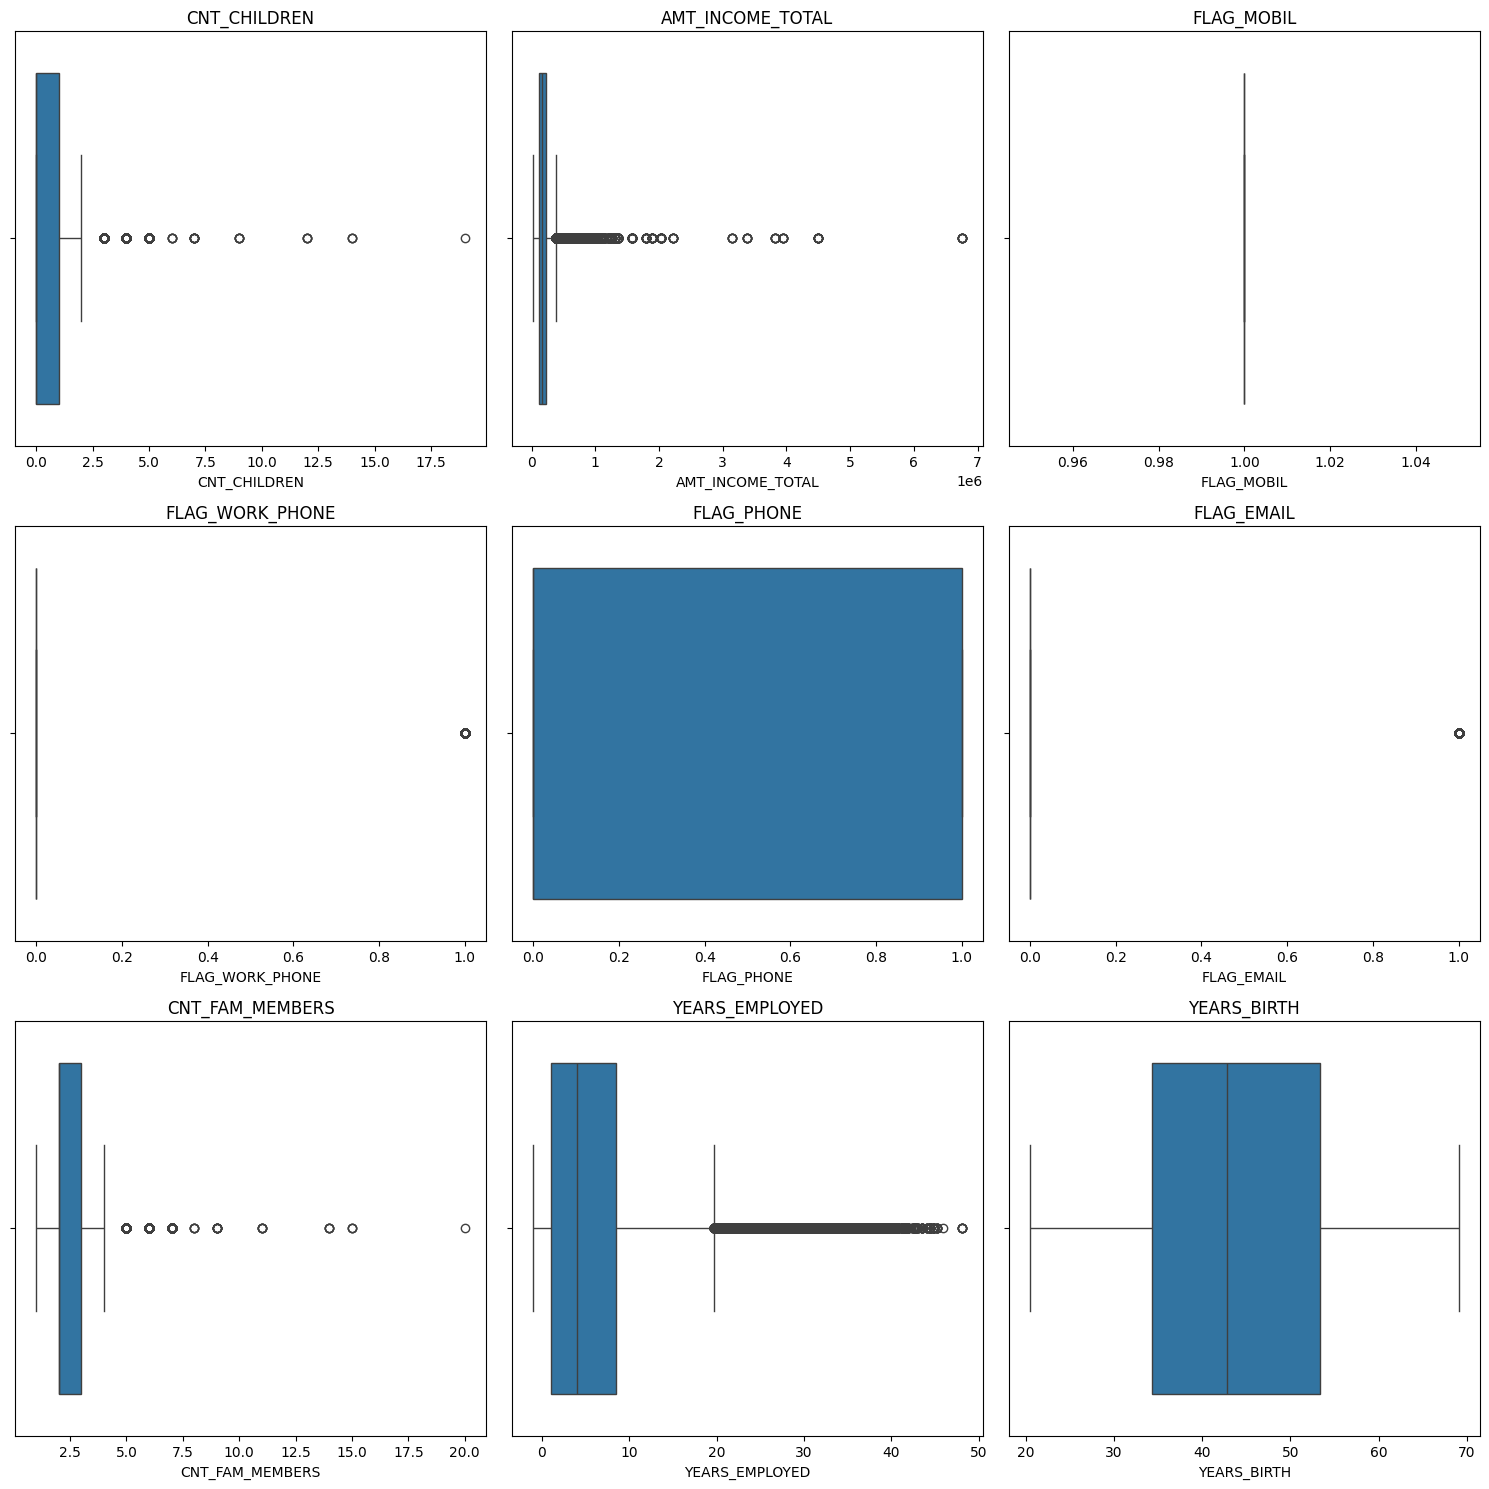

In [116]:
# Selecionar apenas as colunas numéricas, excluindo a coluna 'ID'
colunas_numericas = dados_cliente_ID_unicos.select_dtypes(include=['number']).drop('ID', axis=1).columns

# Criar uma figura com subplots
num_colunas = len(colunas_numericas)
num_linhas = (num_colunas + 2) // 3  # Calcular o número de linhas necessárias para os subplots
fig, axes = plt.subplots(nrows=num_linhas, ncols=3, figsize=(15, 5 * num_linhas))

# Iterar pelas colunas numéricas e criar boxplots em cada subplot
for i, coluna in enumerate(colunas_numericas):
    linha = i // 3
    coluna_subplot = i % 3
    sns.boxplot(x=dados_cliente_ID_unicos[coluna], ax=axes[linha, coluna_subplot])
    axes[linha, coluna_subplot].set_title(coluna)

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()


Dos gráficos fica claro que as colunas CNT_CHILDREN, AMT_INCOME_TOTAL, CNT_FAM_MEMBERS e YEARS_EMPLOYED ainda possuem outliers.

Precisamos analisar se esta remoção será significativa em relação ao todo.

In [121]:

# Definir os limites para identificar outliers usando o método IQR (Interquartile Range)
def identificar_outliers_iqr(data, coluna):
  Q1 = data[coluna].quantile(0.25)
  Q3 = data[coluna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  outliers = data[(data[coluna] < limite_inferior) | (data[coluna] > limite_superior)]
  return outliers

# Lista de colunas para verificar outliers
colunas_outliers = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'YEARS_EMPLOYED']

# Inicializar um DataFrame para armazenar as linhas com outliers
linhas_com_outliers = pd.DataFrame()

# Iterar pelas colunas e identificar outliers
for coluna in colunas_outliers:
  outliers_df = identificar_outliers_iqr(dados_cliente_ID_unicos, coluna)
  linhas_com_outliers = pd.concat([linhas_com_outliers, outliers_df])

# Remover duplicatas para obter o número total de linhas com pelo menos um outlier
linhas_com_outliers = linhas_com_outliers.drop_duplicates()

# Quantidade de linhas com outliers
quantidade_linhas_com_outliers = linhas_com_outliers.shape[0]

print(f"A quantidade de linhas com outliers nas colunas {colunas_outliers} é: {quantidade_linhas_com_outliers}")


A quantidade de linhas com outliers nas colunas ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'YEARS_EMPLOYED'] é: 45698


In [118]:
percentual = quantidade_linhas_com_outliers / dados_cliente_ID_unicos.shape[0] * 100
print(f'O percentual de linhas com outliers é de {percentual:.2f}%')

O percentual de linhas com outliers é de 10.42%


Esta quantidade de linhas com outliers já é bastante representativa em nossa base. Vamos salvar este filtro em um novo dataframe de modo que tenhamos duas metodologias de treino do modelo e possamos futuramente compara-las.

In [123]:
dados_cliente_sem_outliers = dados_cliente_ID_unicos.drop(linhas_com_outliers.index)
dados_cliente_sem_outliers.shape

(392765, 18)

In [125]:
dados_cliente_sem_outliers.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS_EMPLOYED,YEARS_BIRTH
count,3.927650e+05,392765.000000,392765.000000,392765.0,392765.000000,392765.000000,392765.000000,392765.000000,392765.000000,392765.000000
mean,6.020099e+06,0.395700,172881.555638,1.0,0.203323,0.283396,0.104915,2.159396,4.648623,43.599583
std,5.718772e+05,0.654967,70522.707355,0.0,0.402471,0.450648,0.306444,0.838173,4.889929,11.703896
min,5.008806e+06,0.000000,26100.000000,1.0,0.000000,0.000000,0.000000,1.000000,-1.000000,20.517808
25%,5.602446e+06,0.000000,117000.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.797260,33.734247
50%,6.046413e+06,0.000000,157500.000000,1.0,0.000000,0.000000,0.000000,2.000000,3.580822,42.317808
75%,6.454094e+06,1.000000,225000.000000,1.0,0.000000,1.000000,0.000000,3.000000,7.610959,53.534247
max,7.999952e+06,2.000000,378900.000000,1.0,1.000000,1.000000,1.000000,4.000000,19.726027,69.043836


No total, temos 8 colunas do tipo objeto. Além disso, 'OCCUPATION_TYPE' possui alguns valores nulos. Temos agora como meta:

* Verificar os valores únicos das features tipo objeto em busca de transforma-los para numéricos;

* Analisar os itens nulos de 'OCCUPATION_TYPE' para tratamento;



In [70]:
for coluna in dados_cliente_ID_unicos.select_dtypes(include=['object']).columns:
  print(f"Valores únicos da coluna '{coluna}': {dados_cliente_ID_unicos[coluna].unique()}")

Valores únicos da coluna 'CODE_GENDER': ['M' 'F']
Valores únicos da coluna 'FLAG_OWN_CAR': ['Y' 'N']
Valores únicos da coluna 'FLAG_OWN_REALTY': ['Y' 'N']
Valores únicos da coluna 'NAME_INCOME_TYPE': ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
Valores únicos da coluna 'NAME_EDUCATION_TYPE': ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Valores únicos da coluna 'NAME_FAMILY_STATUS': ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
Valores únicos da coluna 'NAME_HOUSING_TYPE': ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
Valores únicos da coluna 'OCCUPATION_TYPE': [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barm

In [71]:
# Crie um objeto OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Selecione as colunas do tipo 'object'
object_cols = dados_cliente_ID_unicos.select_dtypes(include=['object']).columns

# Aplique o OneHotEncoder às colunas selecionadas
encoded_data = enc.fit_transform(dados_cliente_ID_unicos[object_cols]).toarray()

# Crie um novo DataFrame com os dados codificados
feature_names = enc.get_feature_names_out(object_cols)
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Concatene o DataFrame codificado com o DataFrame original, removendo as colunas originais
dados_cliente_ID_unicos = dados_cliente_ID_unicos.drop(columns=object_cols)
dados_cliente_ID_unicos = pd.concat([dados_cliente_ID_unicos, encoded_df], axis=1)


# 5. Análise e Exploração dos dados

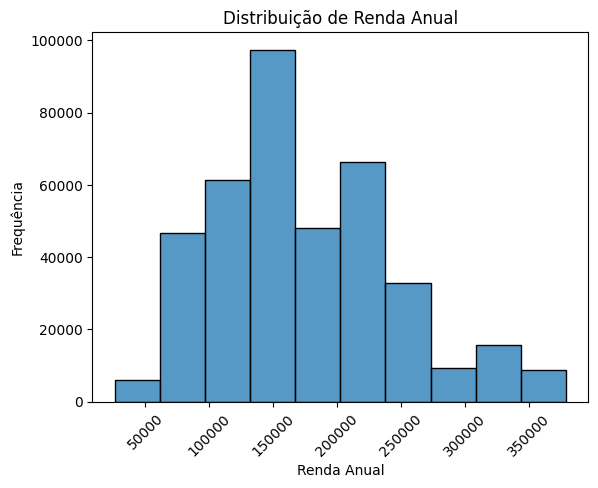

In [129]:
sns.histplot(data=dados_cliente_sem_outliers, x='AMT_INCOME_TOTAL', bins=10)
plt.title('Distribuição de Renda Anual')
plt.xlabel('Renda Anual')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

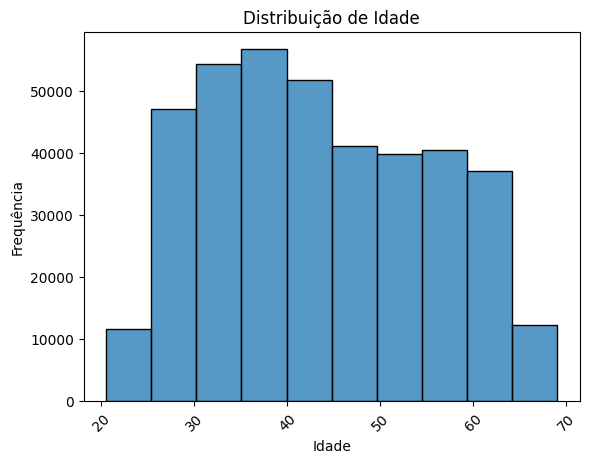

In [135]:
sns.histplot(data=dados_cliente_sem_outliers, x='YEARS_BIRTH', bins=10)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

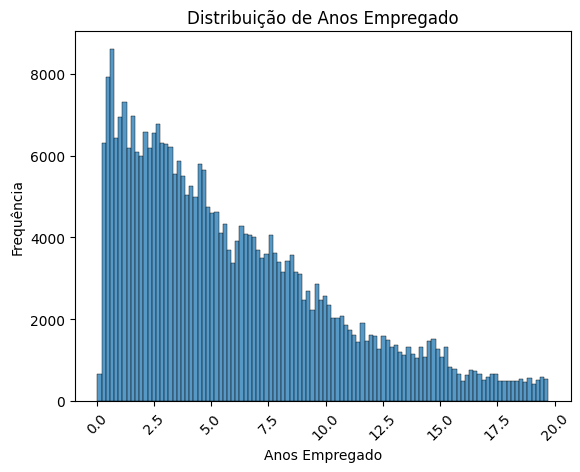

In [136]:
sns.histplot(data=dados_cliente_sem_outliers.query("YEARS_EMPLOYED > 0"), x='YEARS_EMPLOYED')
plt.title('Distribuição de Anos Empregado')
plt.xlabel('Anos Empregado')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

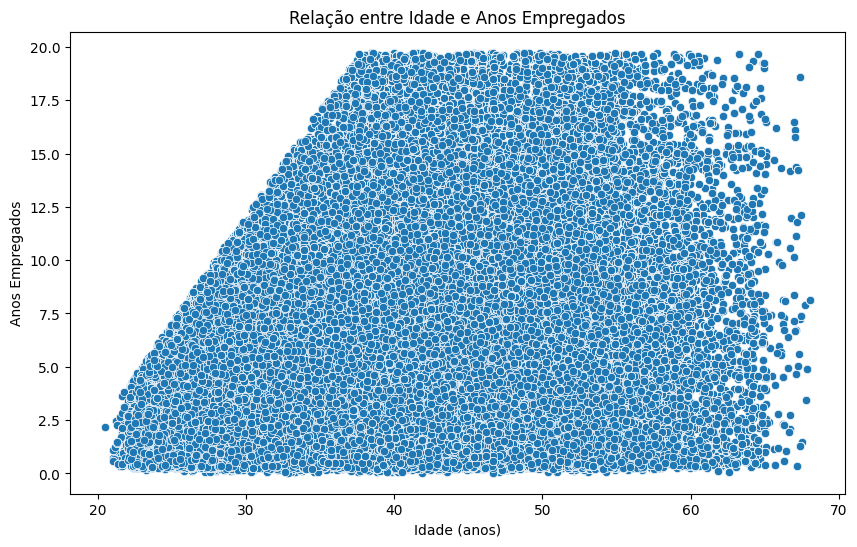

In [138]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YEARS_BIRTH', y='YEARS_EMPLOYED', data=dados_cliente_sem_outliers.query("YEARS_EMPLOYED > 0"))
plt.title('Relação entre Idade e Anos Empregados')
plt.xlabel('Idade (anos)')
plt.ylabel('Anos Empregados')
plt.show()
